# Auto_Correlation Function and Partial AutoCorrelation Function (PACF) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Define a function to plot time series along with ACF and PACF
def plot_ts(y, imgName="series.png", length=10, title=None):
    n = len(y)
    l = np.arange(1, length + 1)
    
    acf = smt.acf(y, nlags=length)
    pacf = smt.pacf(y, nlags=length)
    
    fig, ax = plt.subplots(3, 1, figsize=(10, 8))
    
    if title is not None:
        ax[0].set_title(title)
        
    ax[0].plot(y)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Value')
    ax[0].legend(['Time Series'])
    
    ax[1].bar(l, acf[1:])
    ax[1].set_xlabel('Lag')
    ax[1].set_ylabel('ACF')
    ax[1].set_title('AutoCorrelation')
    
    ax[2].bar(l, pacf[1:])
    ax[2].set_xlabel('Lag')
    ax[2].set_ylabel('PACF')
    ax[2].set_title('Partial AutoCorrelation')

    plt.tight_layout()
    plt.savefig(imgName)
    plt.show()

Mean and Var of Y: 2.00, 0.0132
Expected values Y: 2.0, 0.0133


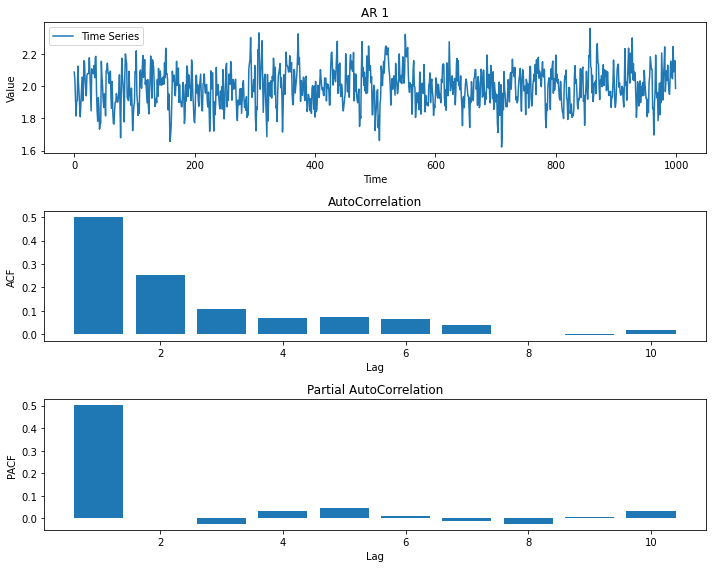

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.90383D-01    |proj g|=  1.86352D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     44      2     0     0   6.888D-04  -8.904D-01
  F = -0.89038405672768617     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(1, 0, 0


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [2]:
# AR(1) Time Series Generation
n = 1000
burn_in = 50
y = np.empty(n)

yt_last = 1.0
d = norm(0, 0.1)
e = d.rvs(n + burn_in)

for i in range(1, n + burn_in + 1):
    yt_last = 1.0 + 0.5 * yt_last + e[i - 1]
    if i > burn_in:
        y[i - burn_in - 1] = yt_last

print(f"Mean and Var of Y: {np.mean(y):.2f}, {np.var(y):.4f}")
print(f"Expected values Y: 2.0, {0.01 / (1 - 0.5**2):.4f}")

plot_ts(y, imgName="ar1_acf_pacf.png", title="AR 1")

# AR(1) Model Fitting
order_ar1 = (1, 0, 0)
ar1 = sm.tsa.SARIMAX(y, order=order_ar1, trend='c')
ar1_result = ar1.fit()
print(ar1_result.summary())

Mean and Var of Y: 1.00, 0.0123
Expected values Y: 1.0, 0.0125


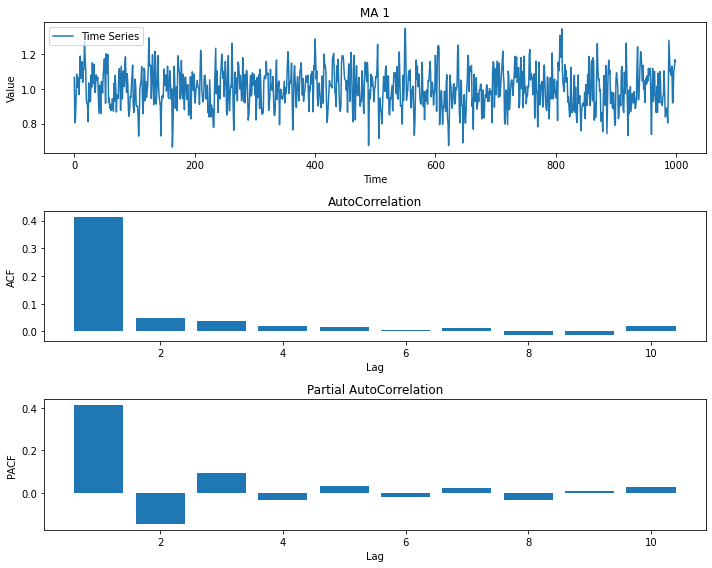

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.75979D-01    |proj g|=  5.77038D-01

At iterate    5    f= -8.85044D-01    |proj g|=  5.45057D-01

At iterate   10    f= -8.91210D-01    |proj g|=  3.48210D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     18      1     0     0   2.036D-05  -8.912D-01
  F = -0.89121003021780687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                        

 This problem is unconstrained.


In [4]:
# MA(1) Time Series Generation
n = 1000
burn_in = 50
y = np.empty(n)

yt_last = 1.0
d = norm(0, 0.1)
e = d.rvs(n + burn_in)

for i in range(2, n + burn_in + 1):  # Start from i = 2
    y_t = 1.0 + 0.5 * e[i - 1] + e[i - 2]  # Use e[i - 2] for the lagged value
    if i > burn_in:
        y[i - burn_in - 1] = y_t

print(f"Mean and Var of Y: {np.mean(y):.2f}, {np.var(y):.4f}")
print(f"Expected values Y: 1.0, {(1 + 0.5**2) * 0.01:.4f}")

plot_ts(y, imgName="ma1_acf_pacf.png", title="MA 1")

# MA(1) Model Fitting
order_ma1 = (0, 0, 1)
ma1 = sm.tsa.SARIMAX(y, order=order_ma1, trend='c')
ma1_result = ma1.fit()
print(ma1_result.summary())